   Id   Area   Bedrooms   Bathrooms   Floors   YearBuilt   Location  \
0   1   1360          5           4        3        1970   Downtown   
1   2   4272          5           4        3        1958   Downtown   
2   3   3592          2           2        3        1938   Downtown   
3   4    966          4           2        2        1902   Suburban   
4   5   4926          1           4        2        1975   Downtown   

    Condition  Garage   Price   Customers  
0   Excellent      No  149919          88  
1   Excellent      No  424998          76  
2        Good      No  266746          27  
3        Fair     Yes  244020          92  
4        Fair     Yes  636056           6  
Названия столбцов в датасете: ['Id', ' Area', ' Bedrooms', ' Bathrooms', ' Floors', ' YearBuilt', ' Location', ' Condition', ' Garage', ' Price', ' Customers']
Типы данных в датасете:
 Id             int64
 Area          int64
 Bedrooms      int64
 Bathrooms     int64
 Floors        int64
 YearBuilt     int6

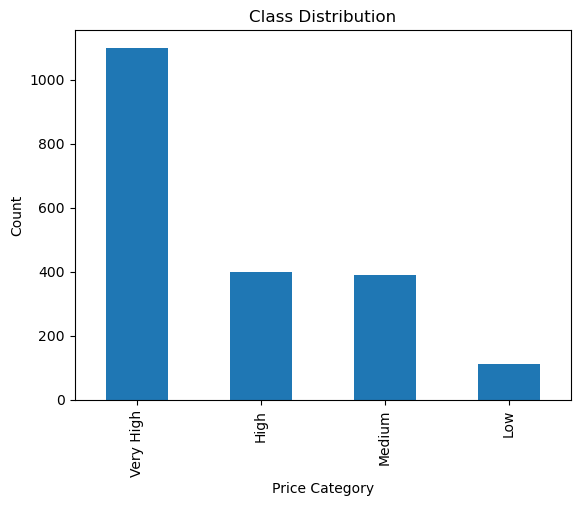

kNN Classification Report:
               precision    recall  f1-score   support

        High       0.19      0.21      0.20        72
         Low       0.09      0.03      0.05        29
      Medium       0.12      0.12      0.12        69
   Very High       0.57      0.60      0.59       230

    accuracy                           0.41       400
   macro avg       0.24      0.24      0.24       400
weighted avg       0.39      0.41      0.40       400

Decision Tree Classification Report:
               precision    recall  f1-score   support

        High       0.14      0.18      0.16        72
         Low       0.07      0.07      0.07        29
      Medium       0.17      0.22      0.19        69
   Very High       0.57      0.47      0.52       230

    accuracy                           0.35       400
   macro avg       0.24      0.24      0.23       400
weighted avg       0.39      0.35      0.36       400

kNN Accuracy: 0.405
Decision Tree Accuracy: 0.3475
kNN ROC AUC: 

In [9]:
# Импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

file_path = r"C:\Users\defau\OneDrive\Desktop\house price prediction dataset.csv"
data = pd.read_csv(file_path)

print(data.head())

print("Названия столбцов в датасете:", data.columns.tolist())
print("Типы данных в датасете:\n", data.dtypes)

data.columns = data.columns.str.strip()

# Теперь попробуем снова преобразовать 'Price' в категории
if 'Price' in data.columns:
    bins = [0, 100000, 300000, 500000, float('inf')]
    labels = ['Low', 'Medium', 'High', 'Very High']
    data['PriceCategory'] = pd.cut(data['Price'], bins=bins, labels=labels)
else:
    print("Столбец 'Price' отсутствует в датасете.")

# Проверка сбалансированности классов
class_counts = data['PriceCategory'].value_counts()
print("Сбалансированность классов:\n", class_counts)

# Визуализация распределения классов
class_counts.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Price Category')
plt.ylabel('Count')
plt.show()

X = data.drop(['Id', 'Price', 'PriceCategory'], axis=1)  # Удаляем ненужные столбцы
X = pd.get_dummies(X)  # Преобразуем категориальные переменные в числовые
y = data['PriceCategory']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Нормализация данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Обучение и оценка kNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Обучение и оценка дерева решений
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)

print("kNN Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dtree))

# Accuracy
print("kNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dtree))

y_test_binary = (y_test == 'High').astype(int)
y_pred_knn_proba = knn.predict_proba(X_test)[:, 1]
y_pred_dtree_proba = dtree.predict_proba(X_test)[:, 1]

print("kNN ROC AUC:", roc_auc_score(y_test_binary, y_pred_knn_proba))
print("Decision Tree ROC AUC:", roc_auc_score(y_test_binary, y_pred_dtree_proba))
